In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
f = open(os.path.expanduser("~/Desktop/current/open-close-businesses.csv"))
df = pd.read_csv(f)
df

,Company Name,District,Billing Street,Category,Sub-Category,Year Opened,Quarter Opened,Quarter Closed,Year Closed
0,Story Winery Tasting Room,C - Old Sacramento Waterfront,NaN,Food & Beverage,Bar,2022.0,Q4,NaN,NaN
1,Holding Space,C - Old Sacramento Waterfront,NaN,"Arts, Culture and Entertainment",Art Galleries,2022.0,Q2,NaN,NaN
2,California State University Employees Union,A - The Kay,910 K Street,NaN,NaN,NaN,NaN,NaN,NaN
3,Sac Wine and Ale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shawn Reginald Clothing Company,A - The Kay,"810 K Street, Suite 105",Services,Alterations + Shoe Repair; Apparel,2022.0,Q1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2725,Macaroni Kid Folsom - El Dorado Hills,NaN,NaN,NaN,Media & Advertising,NaN,NaN,NaN,NaN
2726,ThirdRail,NaN,NaN,Services,Copy + Printing,NaN,NaN,NaN,NaN
2727,ARC Document Solutions,NaN,NaN,Services,Copy + Printing,NaN,NaN,NaN,NaN
2728,Sierra,NaN,NaN,Services,Copy + Printing,NaN,NaN,NaN,NaN


In [3]:
# Fix Year Opened
dfYears = df[df['Year Opened'].notna()]
dfYears

,Company Name,District,Billing Street,Category,Sub-Category,Year Opened,Quarter Opened,Quarter Closed,Year Closed
0,Story Winery Tasting Room,C - Old Sacramento Waterfront,NaN,Food & Beverage,Bar,2022.0,Q4,NaN,NaN
1,Holding Space,C - Old Sacramento Waterfront,NaN,"Arts, Culture and Entertainment",Art Galleries,2022.0,Q2,NaN,NaN
4,Shawn Reginald Clothing Company,A - The Kay,"810 K Street, Suite 105",Services,Alterations + Shoe Repair; Apparel,2022.0,Q1,NaN,NaN
7,King's Halal Mediterranean Food,A - The Kay,NaN,Food & Beverage,Halal; Mediterranean; Middle Eastern,2022.0,Q1,NaN,NaN
8,Loyal Legion Beer Hall,B - Civic Center,NaN,Food & Beverage,Bar,2022.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2714,Golden Gifts,C - Old Sacramento Waterfront,1008 2nd Street,Shopping,Gifts & Souvenirs,2022.0,Q1,NaN,NaN
2720,Carlos the Beautician,C - Old Sacramento Waterfront,"106 L Street, Suite 7",Services,Beauty & Hair Care,2022.0,Q1,NaN,NaN
2721,Columbia Bank,A - The Kay,1015 7th Street,Services,Bank/Financial,2022.0,NaN,NaN,NaN
2722,The Co-Lab,C - Old Sacramento Waterfront,1200 2nd Street,Services,NaN,2021.0,Q4,NaN,NaN


In [4]:
# There were a few outliers that had too many category fields, cleaned it up
dfYears.loc[557, 'Category'] = 'Arts, Culture and Entertainment'
dfYears.loc[1067, 'Category'] = 'Food & Beverage'
dfYears.loc[1060, 'Category'] = 'Food & Beverage'
dfYears.loc[1953, 'Category'] = 'Food & Beverage'
dfYears.loc[2534, 'Category'] = 'Food & Beverage'
dfYears.loc[2393, 'Category'] = 'Shopping'

/Users/tnewman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

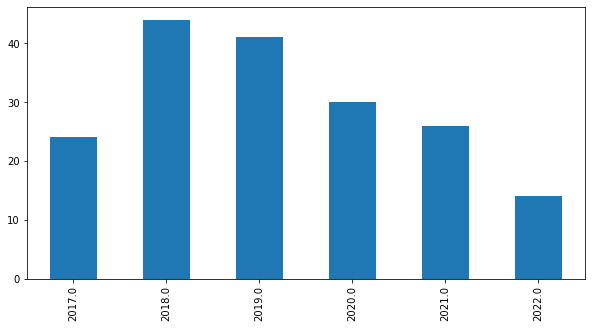

In [5]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
fiveYearsOpened = dfYears[dfYears['Year Opened'].isin(years)]
fig = plt.figure(figsize =(10,5))
fiveYearsOpened['Year Opened'].value_counts().sort_index().plot(kind= 'bar')

<AxesSubplot:>

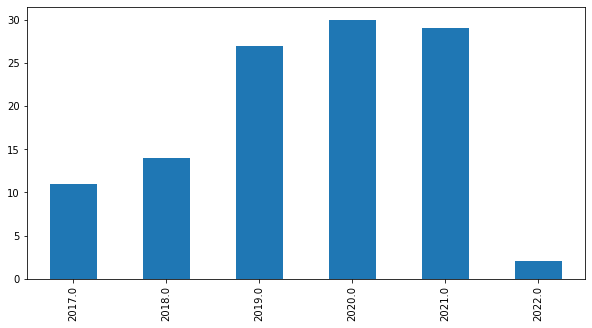

In [6]:
fig = plt.figure(figsize =(10,5))
fiveYearsClosed = dfYears[dfYears['Year Closed'].isin(years)]
fiveYearsClosed['Year Closed'].value_counts().sort_index().plot(kind= 'bar')

<AxesSubplot:ylabel='Year Closed'>

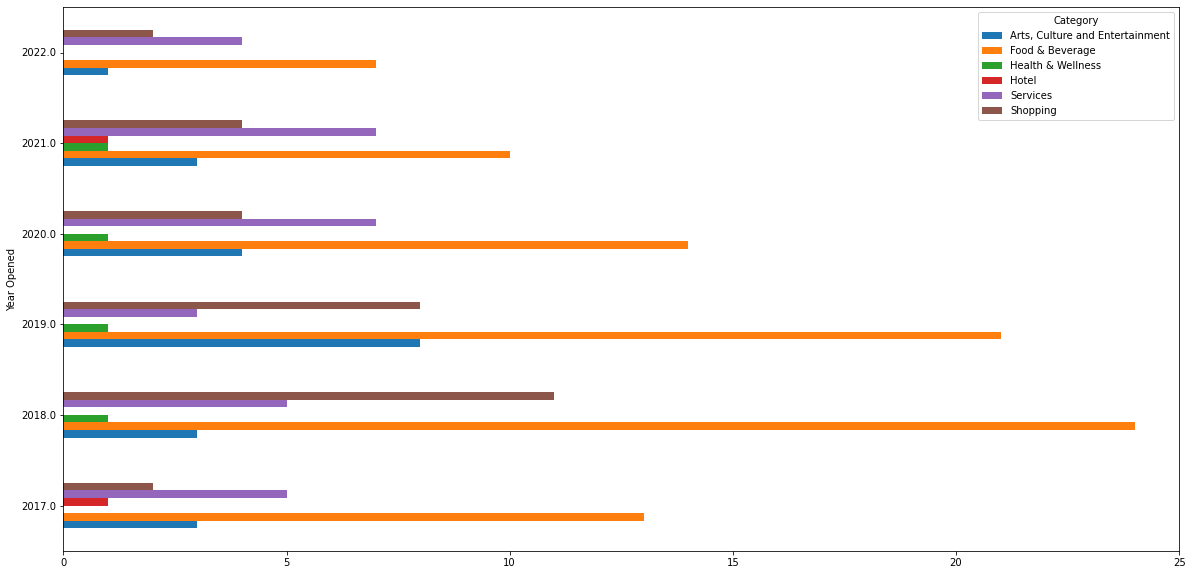

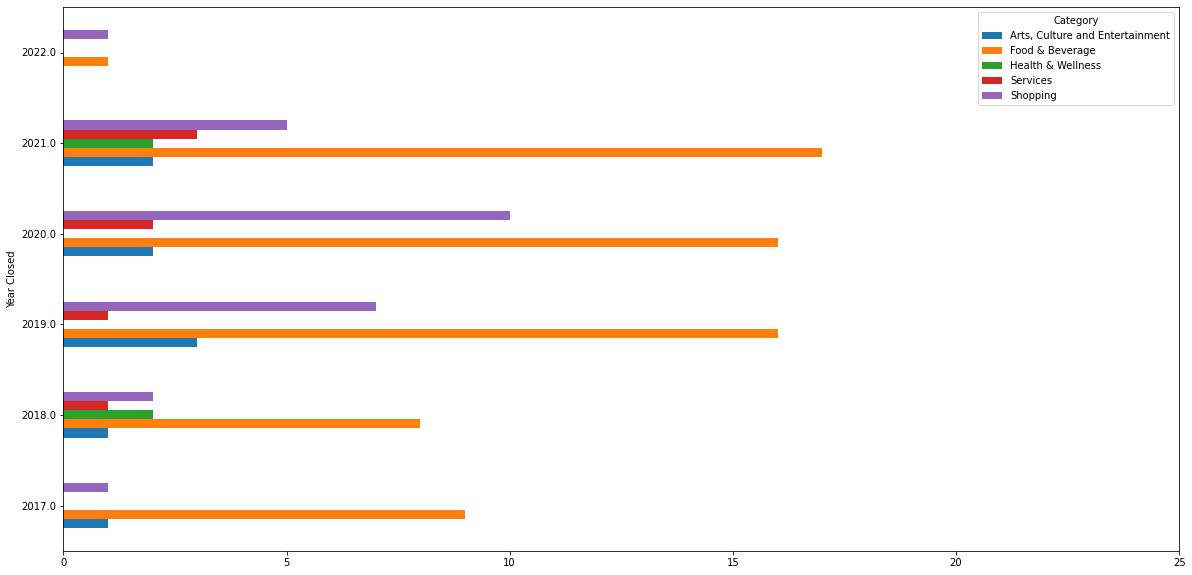

In [24]:
# drilled down to see what open and close trends were in different years

limm = [0,25]
grouped_open = fiveYearsOpened.groupby(['Year Opened', 'Category'])['Category'].count()
grouped_open.unstack().plot.barh(figsize=(20,10), xlim = limm)
grouped_closed = fiveYearsClosed.groupby(['Year Closed', 'Category'])['Category'].count()
grouped_closed.unstack().plot.barh(figsize=(20, 10), xlim = limm)


In [9]:
fiveYears = pd.concat([fiveYearsOpened, fiveYearsClosed])
grouped_fiveYears = fiveYears.groupby(['Year Opened', 'Year Closed', 'Category'])['Category'].count()
grouped_fiveYears

Year Opened  Year Closed  Category         
1973.0       2019.0       Food & Beverage       1
             2020.0       Services              1
1980.0       2021.0       Services              1
1991.0       2020.0       Food & Beverage       1
                          Services              1
                                               ..
2019.0       2021.0       Food & Beverage      10
                          Health & Wellness     2
                          Services              2
2020.0       2021.0       Food & Beverage       6
                          Health & Wellness     2
Name: Category, Length: 89, dtype: int64

In [29]:
# In last five years, how many businesses have opened and closed in each district?
fiveYears = pd.concat([fiveYearsOpened, fiveYearsClosed])
grouped_fiveYears = fiveYears.groupby(['Category', 'District'])[['Year Opened', 'Year Closed']].count()
grouped_fiveYears

Year Opened  \
Category                        District                                     
Arts, Culture and Entertainment A - The Kay                              8   
                                C - Old Sacramento Waterfront           16   
                                E - Entertainment District               4   
                                F - Theater District                     1   
Food & Beverage                 A - The Kay                             59   
                                B - Civic Center                        31   
                                C - Old Sacramento Waterfront           21   
                                D - Capitol Mall                         6   
                                E - Entertainment District              18   
                                F - Theater District                     8   
Health & Wellness               A - The Kay                              6   
                                F - Theater District                     1   
Hotel                           E - Entertainment District               2   
Services                        A - The Kay                              9   
                                B - Civic Center                         4   
                                C - Old Sacramento Waterfront           18   
                                D - Capitol Mall                         2   
                                E - Entertainment District               5   
Shopping                        A - The Kay                             14   
                                B - Civic Center                         2   
                                C - Old Sacramento Waterfront           25   
                                E - Entertainment District              15   

                                                               Year Closed  
Category                        District                                    
Arts, Culture and Entertainment A - The Kay                              4  
                                C - Old Sacramento Waterfront            6  
                                E - Entertainment District               0  
                                F - Theater District                     0  
Food & Beverage                 A - The Kay                             31  
                                B - Civic Center                        20  
                                C - Old Sacramento Waterfront           11  
                                D - Capitol Mall                         2  
                                E - Entertainment District               1  
                                F - Theater District                     7  
Health & Wellness               A - The Kay                              6  
                                F - Theater District                     0  
Hotel                           E - Entertainment District               0  
Services                        A - The Kay                              2  
                                B - Civic Center                         2  
                                C - Old Sacramento Waterfront            6  
                                D - Capitol Mall                         0  
                                E - Entertainment District               0  
Shopping                        A - The Kay                             10  
                                B - Civic Center                         1  
                                C - Old Sacramento Waterfront           15  
                                E - Entertainment District               9